### Importing files from library



In [ ]:
%%capture

!wget https://raw.githubusercontent.com/datacubeR/DeepAnt/master/data/TravelTime_451.csv -O data/TravelTime_451.csv
!wget https://raw.githubusercontent.com/datacubeR/DeepAnt/master/data/DeepAnt.png -O data/DeepAnt.png
!wget https://raw.githubusercontent.com/datacubeR/DeepAnt/master/deepant.py -O deepant.py
!wget https://raw.githubusercontent.com/datacubeR/DeepAnt/master/utils.py -O utils.py
!pip install pytorch-lightning
!pip install torchinfo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

### Data loading


In [ ]:
data = pd.read_pickle('/content/gdrive/MyDrive/eld_filtered_labled.pkl')
data = data.drop('day_of_week',axis=1)
data

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,Consumption
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,1.937882,27.115731,1.585617,155.263258,68.167038,263.700509,5.024925,363.593198,55.127590,38.270338,...,43292.629385,2844.800579,4123.912354,138.483075,5.603357,500.623179,136.130412,790.281806,15547.424484,1
2014-12-31 23:15:00,1.981888,26.923944,1.602215,155.226250,67.874771,266.622308,4.992699,360.330564,53.932498,38.299165,...,42599.507983,2894.784576,4115.998551,133.152841,5.591115,504.128417,137.430207,780.245404,15299.547641,1
2014-12-31 23:30:00,2.029872,26.783984,1.620246,155.026071,67.428167,269.406435,4.996814,357.207358,53.161740,38.403461,...,41799.811247,2928.852599,4095.012055,127.640601,5.541062,508.176658,138.880319,770.151620,15051.396744,1


In [ ]:
data_M300 = data[['MT_300']]
data_M300= data_M300.resample(rule='24H', closed='left', label='left', base=17).sum()
data_M300['value'] = data_M300['MT_300']
data_M300 = data_M300.drop('MT_300',axis =1)


<ipython-input-28-2f6bc50f3e9c>:2: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  data_M300= data_M300.resample(rule='24H', closed='left', label='left', base=17).sum()


In [ ]:
import pandas as pd
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks import ModelCheckpoint
from torchinfo import summary

from deepant import AnomalyDetector, DataModule, TrafficDataset, DeepAnt

from utils import plot_predictions, loss_plot, ts_plot

pl.seed_everything(42, workers=True)


if not torch.cuda.is_available():
    print('Please Activate GPU Accelerator if available')
else:
    print('Everything is Set')

INFO:lightning_fabric.utilities.seed:Global seed set to 42


Everything is Set


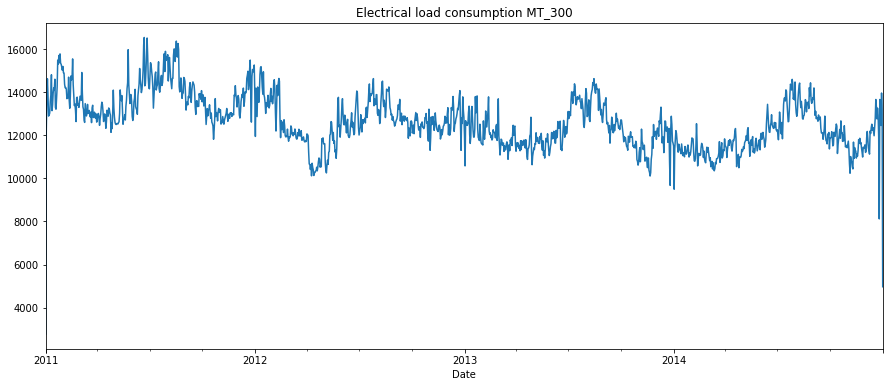

In [ ]:
data_M300.plot(figsize = (15, 6), title = 'Electrical load consumption MT_300', legend = False)

### Data preprocessing



In [ ]:
class ElectricalDataset(Dataset):
    def __init__(self, df, seq_len):
        self.df = df
        self.seq_len = seq_len
        self.sequence, self.labels, self.timestamp = self.create_sequence(df, seq_len)

    def create_sequence(self, df, seq_len):
        sc = MinMaxScaler()
        index = df.index.to_numpy()
        ts = sc.fit_transform(df.value.to_numpy().reshape(-1, 1))
        
        sequence = []
        label = []
        timestamp = []
        for i in range(len(ts) - seq_len):
            sequence.append(ts[i:i+seq_len])
            label.append(ts[i+seq_len])
            timestamp.append(index[i+seq_len])
            
            
        return np.array(sequence), np.array(label), np.array(timestamp)
    
    def __len__(self):
        return len(self.df) - self.seq_len
    
    def __getitem__(self, idx):
        return (torch.tensor(self.sequence[idx], dtype = torch.float).permute(1, 0), 
                torch.tensor(self.labels[idx], dtype = torch.float))

In [ ]:
import torch

SEQ_LEN = 10
dataset = ElectricalDataset(data_M300, SEQ_LEN)
target_idx = dataset.timestamp # Timestamps to detect where the Anomaly Happens
X, y = dataset[0]
X.shape, y.shape, len(dataset) # Checking Sizes are compatible...

(torch.Size([1, 10]), torch.Size([1]), 1452)

### Loading model from library

In [ ]:
model = DeepAnt(SEQ_LEN, 1)
sample = torch.randn(32,1,10)

model(sample).shape

torch.Size([32, 1])

In [ ]:
model = DeepAnt(SEQ_LEN, 1)
anomaly_detector = AnomalyDetector(model)
dm = DataModule(data_M300, SEQ_LEN)
mc = ModelCheckpoint(
    dirpath = 'checkpoints',
    save_last = True,
    save_top_k = 1,
    verbose = True,
    monitor = 'train_loss', 
    mode = 'min'
    )

mc.CHECKPOINT_NAME_LAST = f'DeepAnt-best-checkpoint'
summary(model)

Layer (type:depth-idx)                   Param #
DeepAnt                                  --
├─Sequential: 1-1                        --
│    └─Conv1d: 2-1                       128
│    └─ReLU: 2-2                         --
│    └─MaxPool1d: 2-3                    --
├─Sequential: 1-2                        --
│    └─Conv1d: 2-4                       3,104
│    └─ReLU: 2-5                         --
│    └─MaxPool1d: 2-6                    --
├─Flatten: 1-3                           --
├─Sequential: 1-4                        --
│    └─Linear: 2-7                       1,320
│    └─ReLU: 2-8                         --
│    └─Dropout: 2-9                      --
├─Linear: 1-5                            41
Total params: 4,593
Trainable params: 4,593
Non-trainable params: 0

### Training

In [ ]:
#loading the trainer from library
trainer = pl.Trainer(max_epochs=30,
                    accelerator="gpu",
                    devices=1, 
                    callbacks=[mc], 
                    #progress_bar_refresh_rate=30, 
                    #fast_dev_run=True,
                    #overfit_batches=1
                    )
trainer.fit(anomaly_detector, dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params
--------------------------------------
0 | model     | DeepAnt | 4.6 K 
1 | criterion | L1Loss  | 0     
--------------------------------------
4.6 K     Trainable params
0         Non-trainable params
4.6 K     Total params
0.018     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this D

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 46: 'train_loss' reached 0.78507 (best 0.78507), saving model to '/content/checkpoints/epoch=0-step=46.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 92: 'train_loss' reached 0.76394 (best 0.76394), saving model to '/content/checkpoints/epoch=1-step=92.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 138: 'train_loss' reached 0.75260 (best 0.75260), saving model to '/content/checkpoints/epoch=2-step=138.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 184: 'train_loss' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 230: 'train_loss' reached 0.73937 (best 0.73937), saving model to '/content/checkpoints/epoch=4-step=230.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 276: 'train_loss' reached 0.72359 (best 0.72359), saving model to '/content/checkpoints/epoch=5-step=276.

In [ ]:
anomaly_detector = AnomalyDetector.load_from_checkpoint('checkpoints/DeepAnt-best-checkpoint.ckpt',
                                model = model)

In [ ]:
output = trainer.predict(anomaly_detector, dm)
preds_losses = pd.Series(torch.tensor([item[1] for item in output]).numpy(), index = target_idx)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Predicting: 46it [00:00, ?it/s]

### Loss distribution to determine threshold for anomaly detection

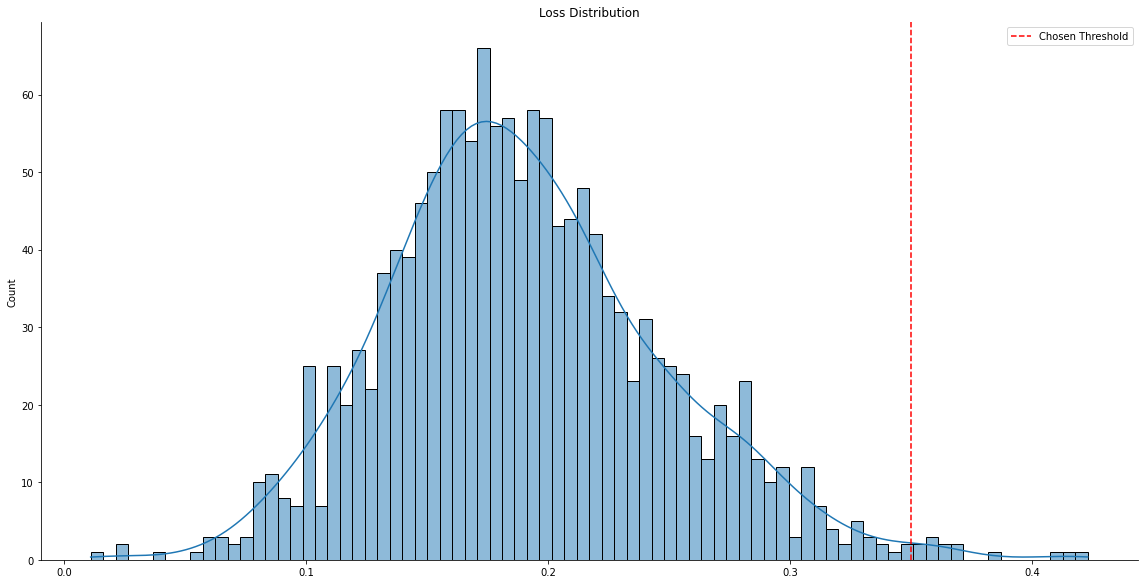

In [ ]:
THRESHOLD = 0.35    
plot_predictions(preds_losses, THRESHOLD)

### Plotting detected anomalies in data

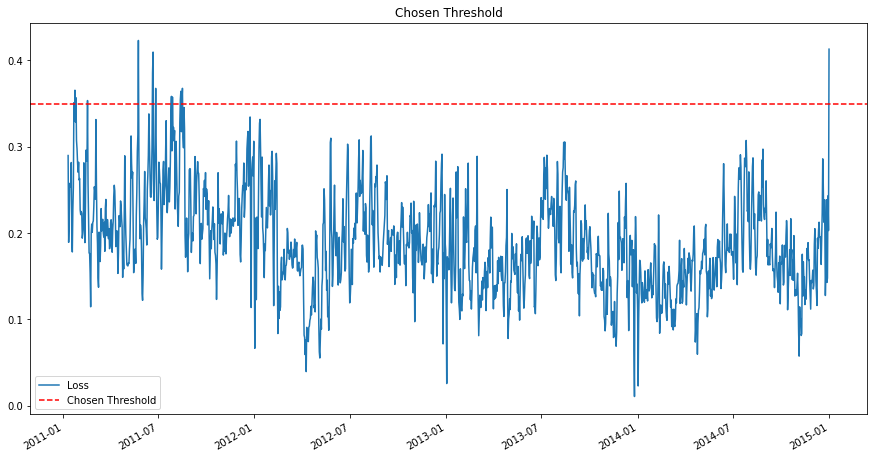

Anomalies Detected: 


2011-01-21 17:00:00    0.350862
2011-01-23 17:00:00    0.365409
2011-01-25 17:00:00    0.356676
2011-02-16 17:00:00    0.353449
2011-05-24 17:00:00    0.422989
2011-06-20 17:00:00    0.385604
2011-06-21 17:00:00    0.409536
2011-06-26 17:00:00    0.367551
2011-07-26 17:00:00    0.358273
2011-07-28 17:00:00    0.357440
2011-08-12 17:00:00    0.354636
2011-08-13 17:00:00    0.364151
2011-08-16 17:00:00    0.367580
2014-12-31 17:00:00    0.412911
dtype: float32

In [ ]:
loss_plot(preds_losses, THRESHOLD)

print('Anomalies Detected: ')
preds_losses.loc[lambda x: x > THRESHOLD]

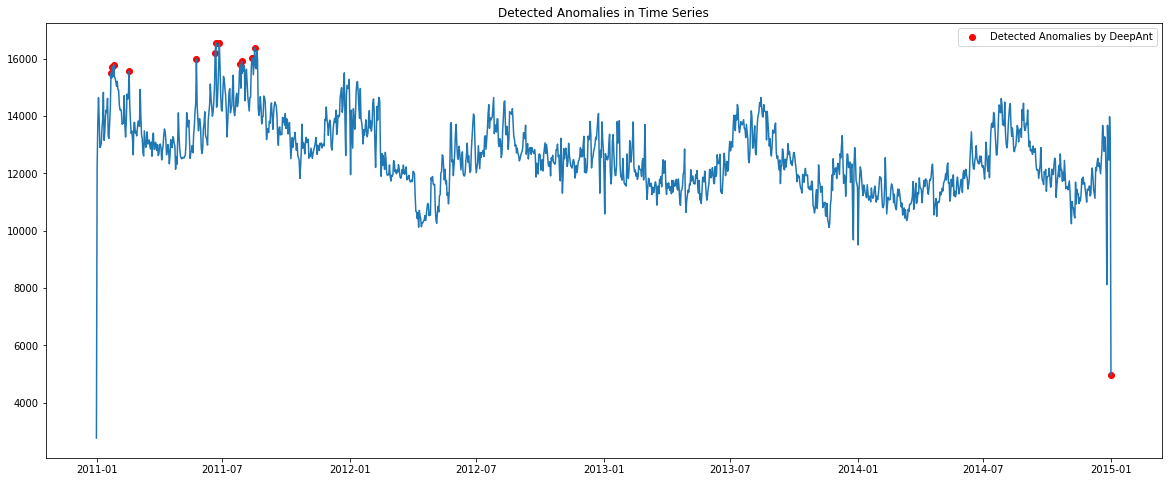

In [ ]:
ts_plot(data_M300, preds_losses, THRESHOLD)